# <b>barplot<b>

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> can plot bar charts using  `fcp.bar`.  At a minimum, the `bar` function requires the following keywords:
<ul>
<li> df: a pandas DataFrame</li>
<li> x: the name of the categorical data column
<li> y: the name of the DataFrame column containing the values for the data in column "x"</li>
</ul>

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
db = pdb.set_trace

### Sample data

Read some fake bar chart data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_bar.csv'))
df.head()

,Liquid,pH,Measurement,T [C]
0,Lemon juice,2.4,A,25
1,Orange juice,3.5,A,25
2,Battery acid,1.0,A,25
3,Bottled water,6.7,A,25
4,Coke,3.0,A,25


### Set theme

Optionally set the design theme

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Bar plot types

### Vertical

Consider a DataFrame that contains several sets of measured pH data for various liquids.  First we plot only one set of measured data (note that we envoke the keyword to rotate the x tick labels so they are all readable):

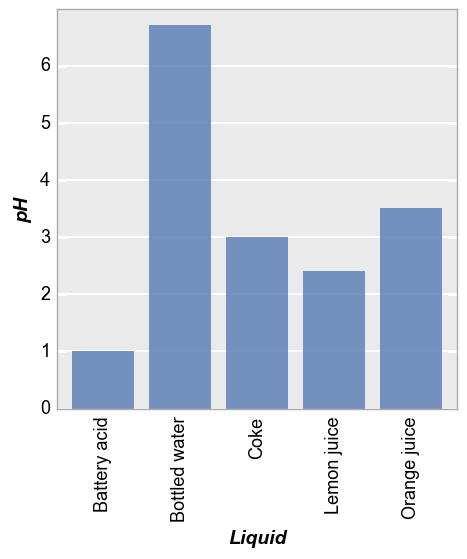

In [5]:
fcp.bar(df, x='Liquid', y='pH', show=SHOW, filter='Measurement=="A" & T [C]==25', tick_labels_major_x_rotation=90)

### Horizontal

We can plot the same data horizontally by adding the keyword ``horizontal=True`` (notice now we do not need to rotate tick labels):

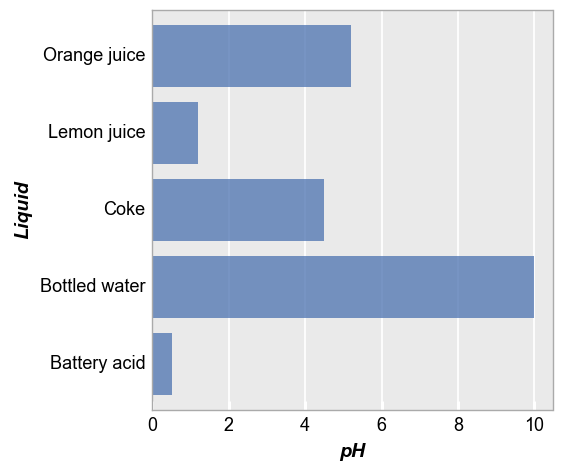

In [6]:
fcp.bar(df, x='Liquid', y='pH', show=SHOW, filter='Measurement=="A"', horizontal=True)

### Error bars

Now we can include all measurement sets in a single bar char.  **Now the bars represent the mean value of all data sets**.  We can also add error bars to indidcate the standard deviation between measurements:

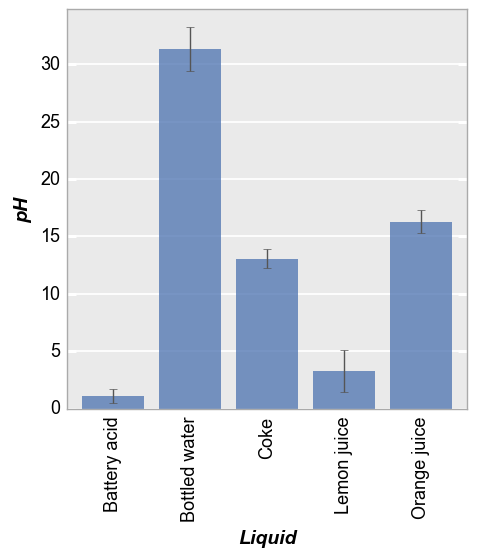

In [7]:
fcp.bar(df, x='Liquid', y='pH', show=SHOW, tick_labels_major_x_rotation=90, error_bars=True)

## Grouping

Like the <font style="font-family:'Courier New'">plot</font> function, bar plots can grouped in various ways to provide further insight intot the data set.  This includes a `legend`, "stacking", `row` and/or `col` subplot values, and `wrap` values.

### Legend

With a legend, each measurement set can be explicitly displayed in subsequent bars:

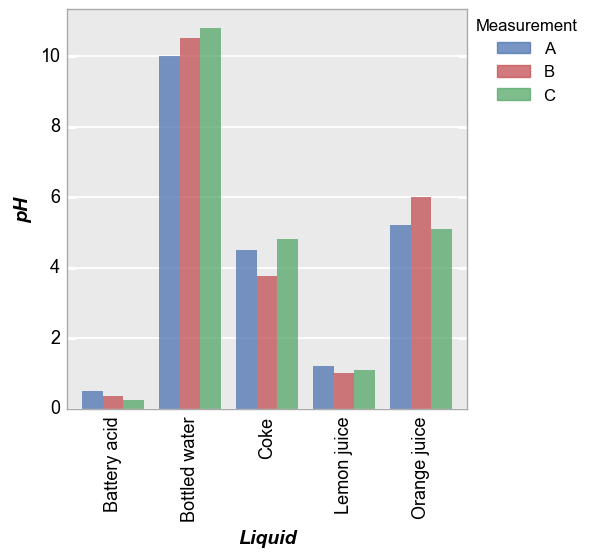

In [8]:
fcp.bar(df, x='Liquid', y='pH', show=SHOW, tick_labels_major_x_rotation=90, legend='Measurement')

### Stacked

Alternatively, we can stack the measurements to give a cumulative bar using the keyword `stacked=True` (which makes absolutely no sense for this data set but whatever):

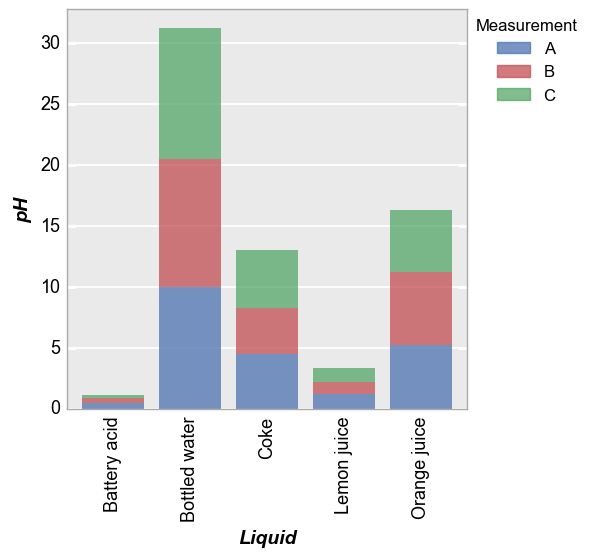

In [9]:
fcp.bar(df, x='Liquid', y='pH', show=SHOW, tick_labels_major_x_rotation=90, stacked=True, legend='Measurement')

### Row/column plot

We can separate different conditions using row/col plots as shown below:

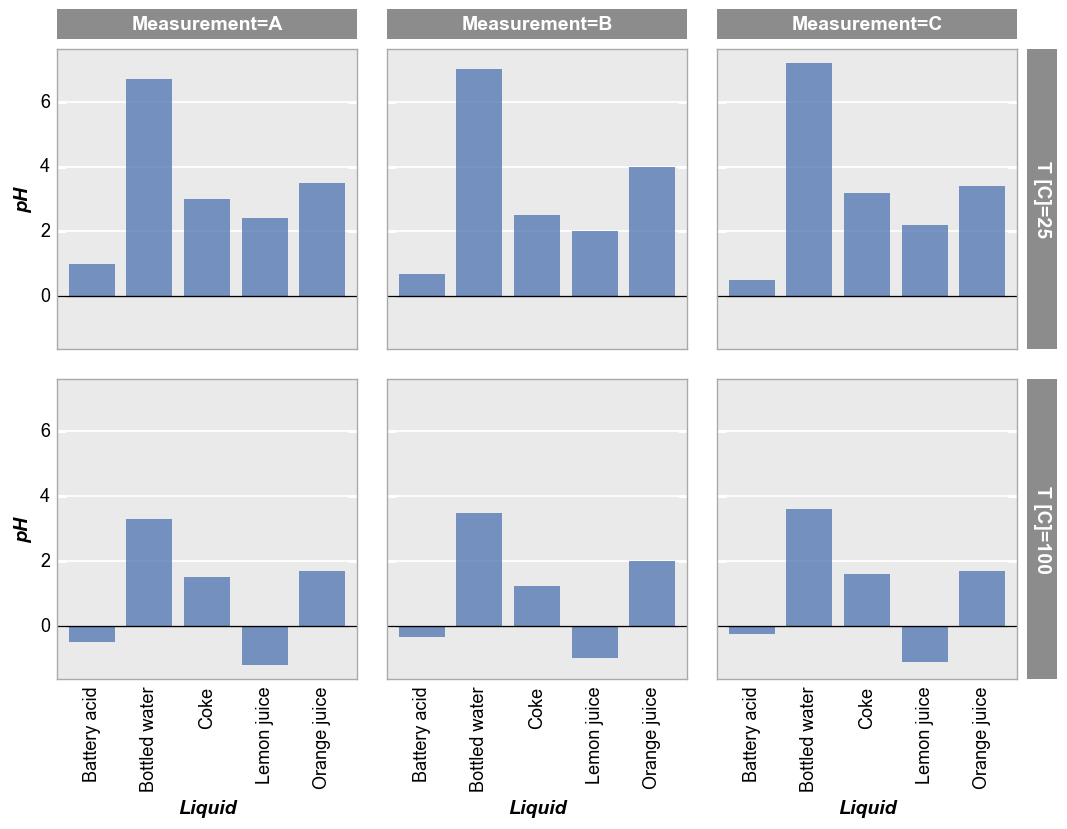

In [10]:
fcp.bar(df, x='Liquid', y='pH', show=SHOW, tick_labels_major_x_rotation=90, col='Measurement', row='T [C]', ax_hlines=0, ax_size=[300, 300])

### Wrap plot

Alternatively, we can use a `wrap` plot to visualize:

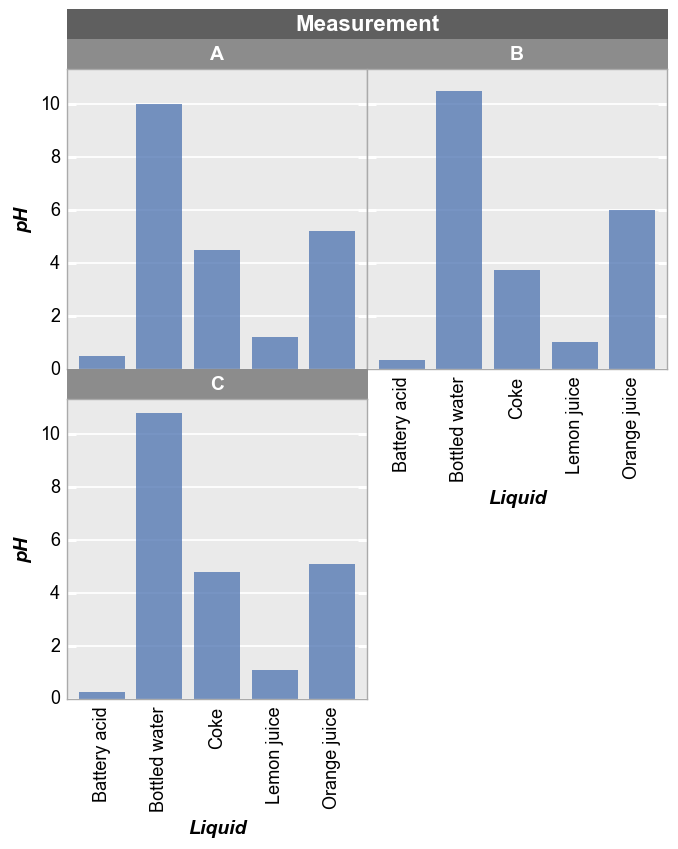

In [11]:
fcp.bar(df, x='Liquid', y='pH', show=SHOW, tick_labels_major_x_rotation=90, wrap='Measurement', ax_size=[300, 300])

## Rolling mean

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> can automatically apply a rolling mean to bar chart data using the kwarg `rolling_mean` to which we pass a positive integer window size for the mean calculation. 

In [12]:
df2 = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'real_data_bar.csv'))

### Default style

By default, the rolling mean curve will have markers disabled and will use the second color in the default color list (red) and a line width of 2:

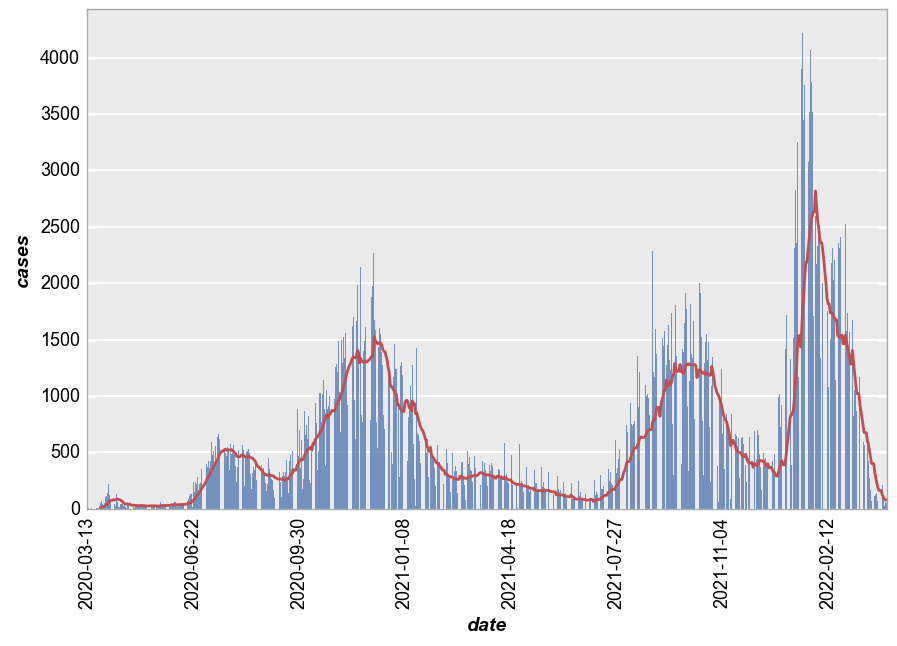

In [13]:
fcp.bar(df2, x='date', y='cases', show=SHOW, ax_size=[800, 500], tick_labels_major_x_rotation=90, rolling_mean=14)

### Custom style

The rolling mean curve style can be easily modified using standard parameters with the `rolling_mean_` prefix.  Markers can also be enabled using the `markers` element object:

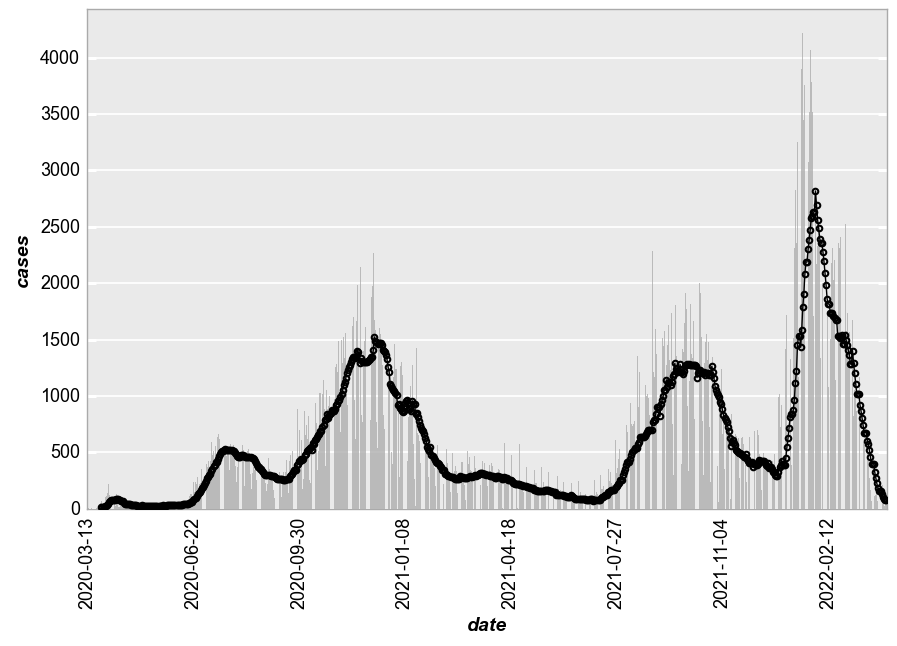

In [14]:
fcp.bar(df2, x='date', y='cases', show=SHOW, ax_size=[800, 500], tick_labels_major_x_rotation=90, rolling_mean=14, 
        bar_fill_color='#aaaaaa', rolling_mean_line_color='#000000', rolling_mean_line_width = 1, markers=True, marker_size=4)